In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(font="IPAexGothic",style="white")
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
import lightgbm as lgb
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pycaret.classification import *

/Users/kouki/opt/anaconda3/envs/pycaret-env/lib/python3.8/site-packages/pycaret/internal/tabular.py:73: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submit.csv",header=None)

In [4]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,26,Travel_Rarely,450.941476,Research & Development,7.601074,3,Medical,1291,4,Male,43,2,1,Laboratory Technician,2,Single,16307,1,Y,No,13,3,3,80,0,1,3,2,11,8,7,0,0
1,3,47,Travel_Rarely,730.235896,Research & Development,26.739489,3,Technical Degree,1587,2,Male,98,2,1,Research Scientist,1,Divorced,9526,8,Y,Yes,11,3,3,80,1,20,1,1,5,9,4,4,0
2,7,26,Travel_Rarely,1082.560066,Human Resources,7.374739,3,Life Sciences,1591,2,Male,84,2,1,Human Resources,2,Married,10596,8,Y,No,18,3,2,80,1,4,3,3,3,2,0,2,0
3,10,46,Travel_Rarely,706.247579,Research & Development,14.791373,1,Medical,1572,1,Female,79,2,1,Laboratory Technician,3,Divorced,5762,0,Y,Yes,20,4,4,80,1,6,0,1,5,4,7,7,1
4,11,25,Travel_Rarely,500.610860,Research & Development,2.146966,4,Medical,981,2,Male,98,3,2,Manufacturing Director,3,Divorced,17068,6,Y,Yes,14,3,2,80,1,8,3,3,1,0,0,0,0


In [5]:
exp1 = setup(train, target = 'Attrition',fold_shuffle=True)

,Description,Value
0,session_id,260
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1200, 34)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8594,0.8095,0.4112,0.6753,0.5020,0.4287,0.4501,0.3140
lightgbm,Light Gradient Boosting Machine,0.8534,0.8420,0.3508,0.6867,0.4591,0.3854,0.4168,0.0200
ridge,Ridge Classifier,0.8522,0.0000,0.4175,0.6573,0.5046,0.4229,0.4413,0.0080
gbc,Gradient Boosting Classifier,0.8510,0.8440,0.3250,0.6758,0.4342,0.3624,0.3959,0.0670
rf,Random Forest Classifier,0.8427,0.8165,0.1654,0.7333,0.2635,0.2205,0.2999,0.0620
lda,Linear Discriminant Analysis,0.8426,0.8041,0.4842,0.5894,0.5261,0.4335,0.4397,0.0170
ada,Ada Boost Classifier,0.8415,0.8181,0.4179,0.5904,0.4819,0.3932,0.4047,0.0340
et,Extra Trees Classifier,0.8415,0.8023,0.2054,0.5862,0.3008,0.2475,0.2907,0.0500
dummy,Dummy Classifier,0.8200,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0030
knn,K Neighbors Classifier,0.7950,0.5754,0.0596,0.2236,0.0921,0.0220,0.0274,0.0080


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=260, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8690,0.8812,0.3333,0.8333,0.4762,0.4167,0.4742
1,0.8333,0.7604,0.4667,0.5385,0.5000,0.4006,0.4021
2,0.8452,0.8415,0.3333,0.6250,0.4348,0.3546,0.3782
3,0.8929,0.8493,0.6000,0.7500,0.6667,0.6038,0.6091
4,0.8095,0.7169,0.1333,0.4000,0.2000,0.1216,0.1455
5,0.9167,0.8696,0.6000,0.9000,0.7200,0.6733,0.6924
6,0.8690,0.7942,0.4667,0.7000,0.5600,0.4867,0.5005
7,0.8452,0.7778,0.3333,0.6250,0.4348,0.3546,0.3782
8,0.8452,0.7849,0.3125,0.7143,0.4348,0.3607,0.4022


In [9]:
lr_tune = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8810,0.8812,0.4000,0.8571,0.5455,0.4872,0.5342
1,0.8452,0.7729,0.4667,0.5833,0.5185,0.4277,0.4315
2,0.8452,0.8155,0.3333,0.6250,0.4348,0.3546,0.3782
3,0.8929,0.8367,0.6000,0.7500,0.6667,0.6038,0.6091
4,0.8214,0.7304,0.2000,0.5000,0.2857,0.2045,0.2328
5,0.8929,0.8686,0.4667,0.8750,0.6087,0.5532,0.5900
6,0.8452,0.8135,0.4667,0.5833,0.5185,0.4277,0.4315
7,0.8690,0.7778,0.4667,0.7000,0.5600,0.4867,0.5005
8,0.8333,0.7794,0.3125,0.6250,0.4167,0.3318,0.3590


In [15]:
lr_tune.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=4.168, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=260, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [29]:
#テストデータに対して予測
lr_predict = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8504,0.7971,0.3548,0.6111,0.4490,0.3694,0.3877


In [30]:
lr_tune_predict = predict_model(lr_tune)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8504,0.8041,0.3548,0.6111,0.4490,0.3694,0.3877


In [31]:
#実際に予測用データに適用
predictions = predict_model(lr_tune, data=test)
predictions

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label,Score
0,1,34,Travel_Frequently,358.039056,Research & Development,9.926847,3,Life Sciences,843,1,...,1,11,2,3,7,7,2,7,0,0.9313
1,2,37,Travel_Rarely,749.376719,Research & Development,10.391959,3,Medical,1361,1,...,0,5,3,2,1,3,1,0,0,0.6203
2,4,34,Travel_Frequently,958.484177,Research & Development,3.297025,3,Life Sciences,975,2,...,1,21,2,2,4,3,1,4,0,0.9793
3,5,34,Travel_Rarely,79.174592,Research & Development,2.430032,4,Medical,1591,3,...,3,9,3,3,20,6,1,4,0,0.9689
4,6,29,Travel_Rarely,943.191218,Research & Development,10.017149,2,Life Sciences,1803,3,...,1,25,2,4,1,7,0,0,0,0.9212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1991,26,Travel_Rarely,1437.994264,Research & Development,1.312387,3,Medical,716,1,...,1,1,3,3,13,10,5,13,0,0.9065
796,1992,25,Travel_Rarely,446.793690,Research & Development,6.906007,4,Medical,1719,1,...,0,6,5,2,5,4,0,4,0,0.8601
797,1993,26,Travel_Frequently,97.635598,Research & Development,10.730256,3,Medical,1027,3,...,0,9,2,3,5,4,1,4,0,0.7772
798,1995,25,Travel_Frequently,69.246616,Research & Development,0.878959,3,Other,1766,2,...,2,5,3,3,5,0,0,0,1,0.5200


In [26]:
sample[1] = predictions["Label"]
sample

,0,1
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
795,1991,0
796,1992,0
797,1993,0
798,1995,1


In [27]:
# dfをcsv出力　indexをTrueにしたら0からインデックスが降られる、headerはカラム名が一番上に追加される
sample.to_csv("submit12_pycaret_lr.csv", index = False, header=False)

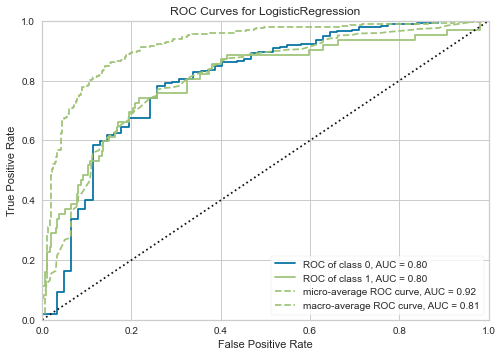

In [28]:
plot_model(lr_tune)

In [16]:
lr_tune

LogisticRegression(C=4.168, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=260, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)